In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz
import statsmodels.api as sm
from filterpy.kalman import KalmanFilter

In [91]:
data = pd.read_csv("floor intput:out to int 20:3.txt")
y = data.iloc[:,0]
x = np.arange(0,y.size)
t = x*0.25
freq = np.fft.fftfreq(len(y), d=t[1]-t[0])

array([-1.67895400e+04+0.00000000e+00j, -7.47738177e+01-1.53718591e+01j,
       -9.95599015e-01+1.79302398e+01j,  1.58631301e+01+1.93260144e+01j,
        1.48802771e+01+3.76321856e+00j, -1.02091419e+01+2.02313344e+01j,
       -1.07764019e+01-6.79005670e+00j,  2.98354165e+01-5.45418605e+00j,
        9.37946350e-01-1.05379810e+01j,  6.91819368e+00-6.80828289e+00j,
        1.74445429e+01+2.14835184e+01j,  1.82655329e+01-4.61217865e+00j,
        1.44348797e+01-1.12715777e+01j, -7.45861266e+00+1.31304735e+00j,
        7.52097262e-01-1.41697651e+01j,  2.27125298e+00-6.72502359e+00j,
       -7.66145566e-01+8.73066082e+00j,  4.01722093e+00+1.21495785e+01j,
        1.91929638e+01-1.57916622e+01j, -5.31766381e+00-1.05068155e+01j,
        8.58233835e+00+5.52027123e+00j, -9.99100128e+00-2.35749101e+01j,
       -1.78380688e+01+3.87578562e-01j, -5.07371021e+00+4.77770424e+00j,
        1.91491668e+00-1.22915757e+01j, -3.61059303e+00-1.02153364e+01j,
       -1.41767028e+00-2.75736602e+00j,  3.92565682

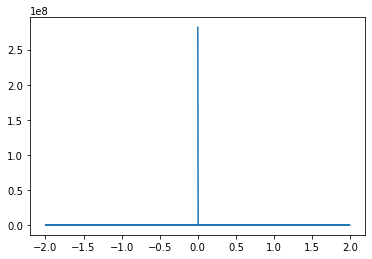

In [95]:
y_f = np.fft.fft(y)
plt.plot(freq, abs(y_f)**2)

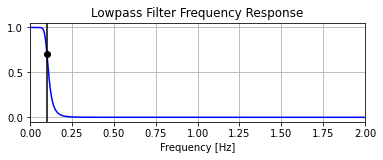

In [80]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

n= x.shape[0]
order = 6
T=0.25
fs = 1/T
cutoff = 0.1#3.667
b, a = butter_lowpass(cutoff, fs, order)

w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
t = np.linspace(0, T, n, endpoint=False)


y = butter_lowpass_filter(raw, cutoff, fs, order)
plt.show()

In [81]:
# f = KalmanFilter (dim_x=1, dim_z=1)
# f.x = np.array(x[0],
#                raw[0])
# f.F = np.eye(2)
# f.H = np.eye(2)
# f.P = np.array([[1000.,    0.],
#                 [   0., 1000.] ])
# f.R = 5
# from filterpy.common import Q_discrete_white_noise
# f.Q = Q_discrete_white_noise(dim=2, dt=0.1, var=0.13)
# Ksmooth = []
# i = 1
# while i<raw.shape[0]:
#     z = raw[i]
#     f.update(z)
#     Ksmooth.append(f.x)
#     i=i+1

In [82]:
# Ksmooth = np.array(Ksmooth)
# K_smooth = []
# for i in range(Ksmooth.shape[0]):
#     K_smooth.append(Ksmooth[i,0,0])

In [83]:
# lowess = sm.nonparametric.lowess
# out = lowess(raw,x, frac=0.0)
# smooth = out[:,1]
true = np.sum(raw)/raw.size
true = np.full(
    shape=raw.shape[0],
    fill_value=true,
)

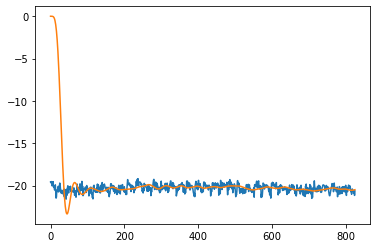

In [85]:
#plt.plot(x[200:400],raw[200:400])
#plt.plot(x[200:400],y[200:400])
plt.plot(x,raw)
plt.plot(x,y)
#plt.plot(x,smooth)
#plt.plot(x[1:],true[1:])
# plt.plot(x[1:],K_smooth)

In [41]:
# def kernel(t):
#     if abs(t)<=1:
#         return 0.75*(1 -  pow(t, 2))
#     else:
#         return 0
#
# def smooth_func(buffer):
#     window_size = buffer.size();
#     x_0 = int(window_size / 2);
#     weight = 0;
#     weight_data_sum = 0;
#     weight_sum = 0;
#     for i in range(window_size):
#         weight = kernel(abs(i - x_0) / window_size)
#     weight_data_sum += weight * int(buffer.at(i));
#     weight_sum += weight;
#     return int(weight_data_sum / weight_sum);

In [47]:
# buffer = np.array([])
# smooth = np.array([])
# for i in range(buffer_size):
#     np.append(buffer,raw[i])
#     #buffer.append(raw[i])
#
# for i in range(buffer_size, raw.size-buffer_size):
#     for j in range(new_data_size):
#         if buffer.size()>=buffer_size:
#             np.append(buffer, raw[i+j])
#             np.delete(buffer, 0)
#             i = i+buffer_size
#
#     smooth.append(smooth_func(buffer))



TypeError: 'int' object is not callable

In [24]:
test_arr = [5,6,7]
test_arr.append(2)
test_arr
raw.size

826